In [1]:
import unidecode
import codecs
import string
import random
import re

all_characters = string.printable
n_characters = len(all_characters)

filename = './speeches.txt'

file = unidecode.unidecode(codecs.open(filename, "r",encoding='utf-8', errors='ignore').read())
file_len = len(file)
print('file_len =', file_len)

file_len = 904663


In [2]:
chunk_len = 200

def random_chunk():
    start_index = random.randint(0, file_len - chunk_len)
    end_index = start_index + chunk_len + 1
    return file[start_index:end_index]

print(random_chunk())

t's a talent. It's a talent. You can't be a politician.
Look, I'm fighting some very nice people. Very nice. Even though I'm leading in the polls. But they're very nice people.
But they're never goin


In [3]:
import torch
import torch.nn as nn
from torch.autograd import Variable

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers)
        self.decoder = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.gru(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))

In [4]:
# Turn string into list of longs
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_characters.index(string[c])
    return Variable(tensor)

print(char_tensor('abcDEF'))

Variable containing:
 10
 11
 12
 39
 40
 41
[torch.LongTensor of size 6]



In [5]:
def random_training_set():    
    chunk = random_chunk()
    inp = char_tensor(chunk[:-1])
    target = char_tensor(chunk[1:])
    return inp, target

In [6]:
def evaluate(prime_str='A', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden()
    prime_input = char_tensor(prime_str)
    predicted = prime_str

    # Use priming string to "build up" hidden state
    for p in range(len(prime_str) - 1):
        _, hidden = decoder(prime_input[p], hidden)
    inp = prime_input[-1]
    
    for p in range(predict_len):
        output, hidden = decoder(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        # Add predicted character to string and use as next input
        predicted_char = all_characters[top_i]
        predicted += predicted_char
        inp = char_tensor(predicted_char)

    return predicted

In [7]:
import time, math

def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [8]:

def train(inp, target):
    hidden = decoder.init_hidden()
    decoder.zero_grad()
    loss = 0

    for c in range(chunk_len):
        output, hidden = decoder(inp[c], hidden)
        loss += criterion(output, target[c])

    loss.backward()
    decoder_optimizer.step()

    return loss.data[0] / chunk_len

In [9]:
n_epochs = 2000
print_every = 100
plot_every = 10
hidden_size = 100
n_layers = 1
lr = 0.005

decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0

for epoch in range(1, n_epochs + 1):
    loss = train(*random_training_set())       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
        print(evaluate('Wh', 100), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

 35s (100 5%) 2.2772]
Wh, and I tom cat Thrapeme. Iu th ining the meat.
 came scyou cous tha the and knon ind andy and to v 

 6s (200 10%) 2.0603]
Whe thanay they doon worgh. And "I Mand Im. I me in ou thing't beded ond the they ther of in whorte he 

 38s (300 15%) 1.9992]
Whe were nen a know but tomoricauth, alk and So gom Pere. And the don't ne lo besis - to resest and al 

 9s (400 20%) 2.0526]
Where suppen to in prestion.




































 

 41s (500 25%) 1.6240]
Whe waste the wellion we're sem the to bremes all not spere. You've people ast make wond what shour wi 

 13s (600 30%) 1.8200]
Whed hen't one tremication.
You going to be started seaunt for. I wo me to we OU Crublemat. Doing to  

 44s (700 35%) 2.2032]
What say.


I was the don't ition make --- want Just uners.
We like and I'll ring the take be all  

 16s (800 40%) 1.7693]
Whing took they greatey out this seendors in polled love and exppoing terce and who the we'll ander we 

 47s (900 45%) 1.8553]

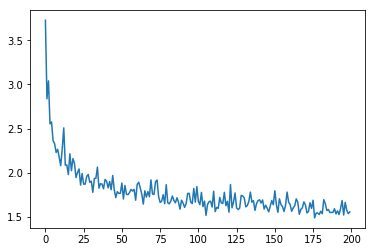

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)

In [11]:
print(evaluate('Th', 200, temperature=0.8))


They our because - they're back I want of build be for what one like very things.




AN the sey build people And the 45%. Shot have bad Hillieve heagore, make us people you will have telled you to


In [12]:
print(evaluate('Th', 200, temperature=0.2))


They because what we're going to be come because when of the world a lot of the world the worked the way which the world the was a lot of the state of the way, when I want to be from the world they want


In [13]:
print(evaluate('Th', 200, temperature=1.4))


Thy bratit dexlaq.

 Lod-mer, nothing ogima faps.
Andy you tupoo, biis? Da worrstanclucagns. Don't sitmisioderinglaby, the rish sep of pho Dplawklewmificil] or Reppolicy cosses.
But go aniotodlist -
